# Is apartment-type property cheaper than house-type on Airbnb?


## Introduction


## Methods: Plan

group_by(property_type) |>
summarise(sample_mean = mean(log_price))Define notations as follows:

- $\mu_h =$  population mean log price of house type listings
- $\mu_a =$ population mean log price of apartment type listings
- $x_h =$  sample mean log price of house type listings
- $x_a =$ sample mean log price of apartment type listings
- $\delta = \mu_h - \mu_a$
- $d = x_h - x_a$
- Null hypothesis $H_0: \delta = 0$
- Alternative hypothesis $H_a: \delta >0$


## Preliminary Results

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

In [2]:
# read data
data <- read.csv("data/train.csv") |>
select(log_price, property_type)
head(data)

,log_price,property_type
,<dbl>,<chr>
1,5.010635,Apartment
2,5.129899,Apartment
3,4.976734,Apartment
4,6.620073,House
5,4.744932,Apartment
6,4.442651,Apartment


In [3]:
# calculate ratio of house-type and apartment type to see if they are the vast majority
prop_house_apartment <- data |>
group_by(property_type) |>
summarize(percent = 100 * n()/nrow(data)) |>
arrange(desc(percent))
head(prop_house_apartment, 5)

property_type,percent
<chr>,<dbl>
Apartment,66.121089
House,22.278744
Condominium,3.586512
Townhouse,2.283062
Loft,1.678563


In [4]:
# Since the majority of the listings are house and apartment, select only those
air <- data |>
filter(property_type %in% c("House", "Apartment"))
head(data,4)

,log_price,property_type
,<dbl>,<chr>
1,5.010635,Apartment
2,5.129899,Apartment
3,4.976734,Apartment
4,6.620073,House


In [5]:
# getting x_a, x_h
sample_mean <- air |>
group_by(property_type) |>
summarise(sample_mean = mean(log_price))
sample_mean

property_type,sample_mean
<chr>,<dbl>
Apartment,4.758850
House,4.797114


We observe $x_h > x_a \text{ which implies  } d > 0$.

In [6]:
# Get sample variance
sample_var <- air |>
group_by(property_type) |>
summarise(sample_var = var(log_price))
sample_var

property_type,sample_var
<chr>,<dbl>
Apartment,0.4106566
House,0.7671395


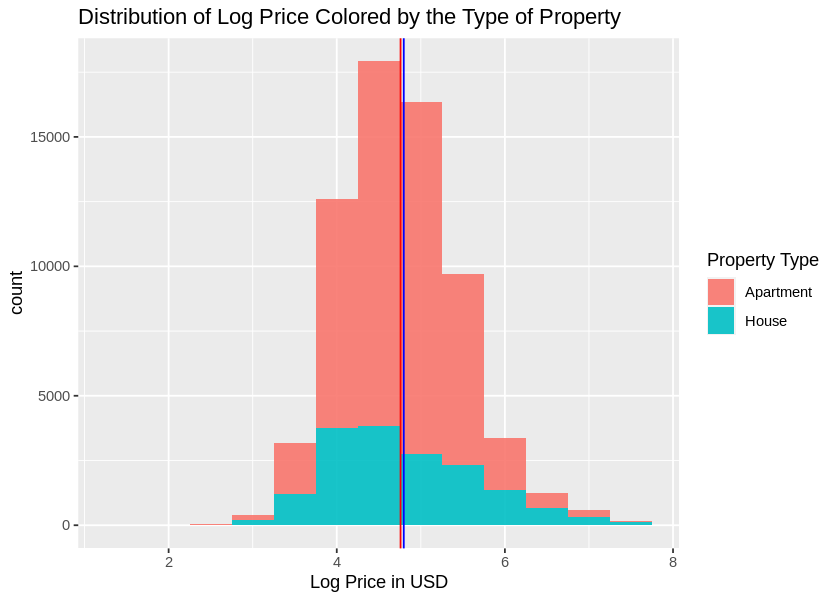

In [10]:
options(repr.plot.width = 7, repr.plot.height = 5)

compare_distribution <- air |>
ggplot(aes(x=log_price,fill=property_type))+
geom_histogram(binwidth=0.5,alpha=0.9)+
labs(fill = "Property Type",x = "Log Price in USD", title = "Distribution of Log Price Colored by the Type of Property") +
geom_vline(xintercept = sample_mean$sample_mean[1], color = "red") +
geom_vline(xintercept = sample_mean$sample_mean[2], color = "blue")

compare_distribution

Red line represents $x_a$, and blue line represents $x_h$.

## References